In [1]:
# load neccesary models

import numpy as np
import cv2
import os
from random import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D, Conv1D, MaxPooling1D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import load_model
from statistics import mean 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load data
data = np.load('resources/dataset.npz', allow_pickle=True)

# allocate data to X or Y
X = data['arr_0']
Y = data['arr_1']

X = list(X)
Y = list(Y)

# preprocess images to right size
for i in range(len(X)):
    img = X[i]
    img = cv2.resize(img, (32, 32))
    X[i] = img

# encode the target values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# turn X and Y in np arrays
X = np.array(X)
Y = np.array(Y)

# split data into 90% training and 10% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# turn the data into categorical data
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [3]:
# design convolutional neural network for open or closed eye detection
def driver_drowsiness_detection_model(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv6', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv7', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    optimizer = Adam(0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# initialize model with the correct shape
model= driver_drowsiness_detection_model(input_shape=(32, 32, 3))
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)

# fit the model on the data with 200 epochs
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=200, validation_data=(X_test, Y_test))

Epoch 1/200
11/11 [==============================] - 4s 284ms/step - loss: 1.2862 - accuracy: 0.5168 - val_loss: 0.9414 - val_accuracy: 0.5342
Epoch 2/200
11/11 [==============================] - 3s 261ms/step - loss: 1.0439 - accuracy: 0.5697 - val_loss: 0.8741 - val_accuracy: 0.5411
Epoch 3/200
11/11 [==============================] - 3s 252ms/step - loss: 0.9388 - accuracy: 0.5704 - val_loss: 0.7796 - val_accuracy: 0.5342
Epoch 4/200
11/11 [==============================] - 3s 275ms/step - loss: 0.9274 - accuracy: 0.5934 - val_loss: 0.6802 - val_accuracy: 0.5137
Epoch 5/200
11/11 [==============================] - 3s 276ms/step - loss: 0.7856 - accuracy: 0.6133 - val_loss: 0.6130 - val_accuracy: 0.6027
Epoch 6/200
11/11 [==============================] - 3s 262ms/step - loss: 0.7319 - accuracy: 0.6531 - val_loss: 0.5705 - val_accuracy: 0.6781
Epoch 7/200
11/11 [==============================] - 3s 267ms/step - loss: 0.7252 - accuracy: 0.6493 - val_loss: 0.5557 - val_accuracy: 0.7671

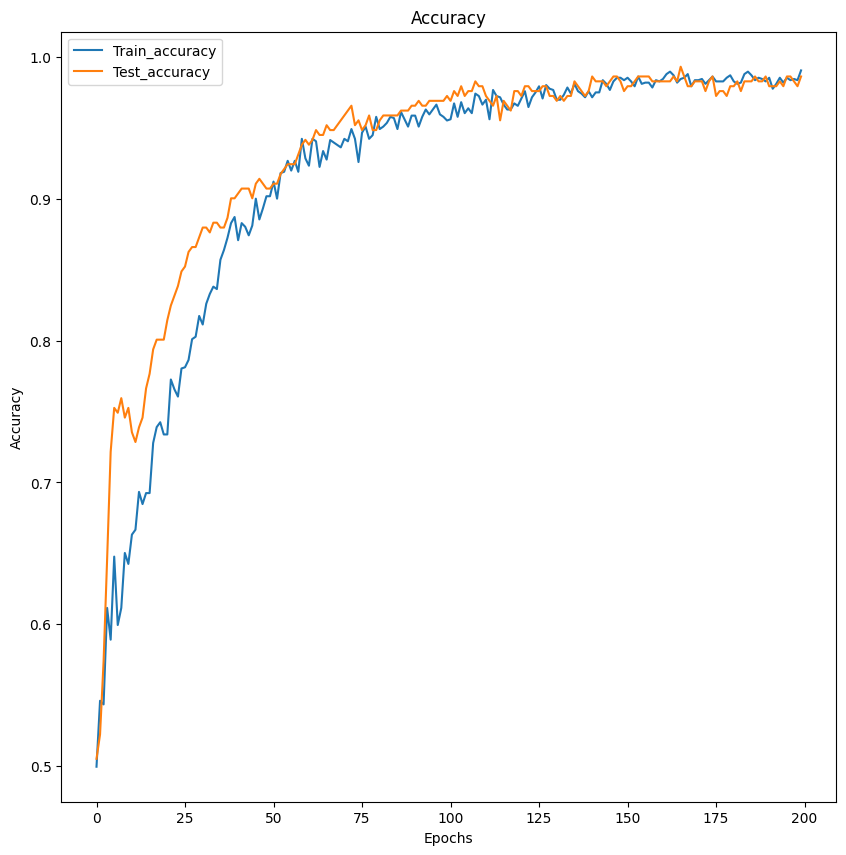

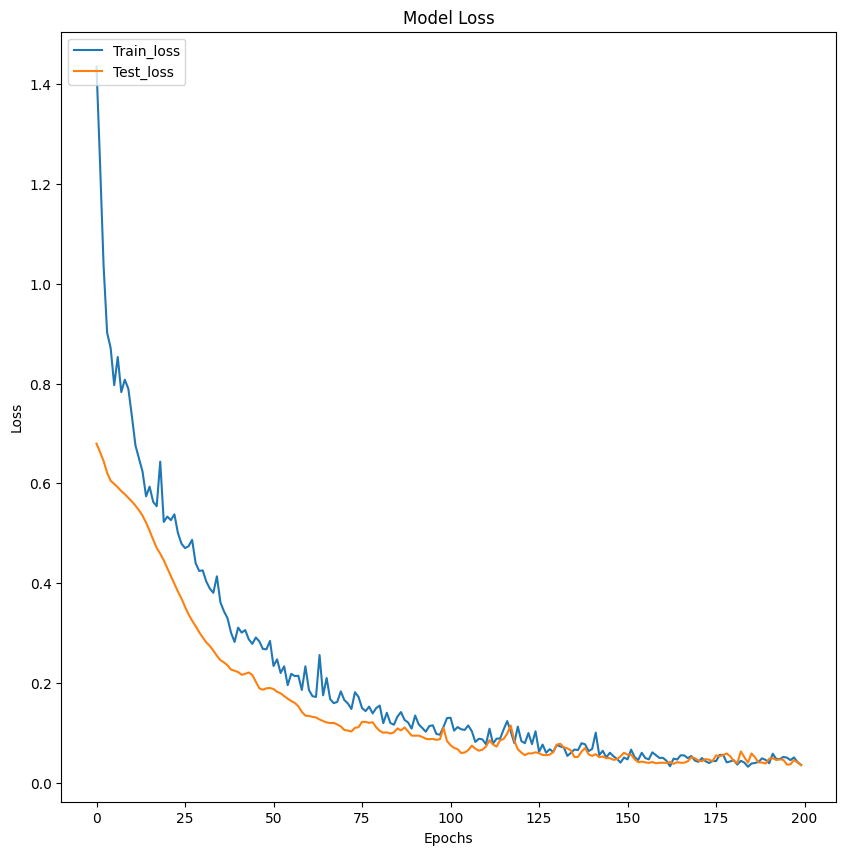

In [13]:
# plot the accuracy over time
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

# plot the loss over time
figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [14]:
# evaluate the model on the test set
pred = model.evaluate(X_test, Y_test)
print(f'Accuracy: {pred[1]}')
print(f'Loss: {pred[0]}')

10/10 [==============================] - 0s 36ms/step - loss: 0.0350 - accuracy: 0.9863
Accuracy: 0.9862542748451233
Loss: 0.0350431464612484


In [15]:
# make predictionso n the test set
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_pred = np.argmax(Y_test, axis=1)

# report the results
print(classification_report(Y_test_pred, ypred))

10/10 [==============================] - 1s 39ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99       148

    accuracy                           0.99       291
   macro avg       0.99      0.99      0.99       291
weighted avg       0.99      0.99      0.99       291



In [17]:
# save the model to access it later without running prior code
model.save('resources/Driver_Drowsiness_Detection.h5')

In [60]:
# load the model again
model = load_model('resources/Driver_Drowsiness_Detection.h5')

# import eye and face cascades from opencv
eye_cascade = cv2.CascadeClassifier('resources/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('resources/haarcascade_frontalface_default.xml')

In [61]:
# define the function that makes predictions from an image file with a person
def predict(path):
    # read in the image
    img = cv2.imread(path)

    # grayscale the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detect faces using the opencv cascade
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # if there is no face return this
    if not (isinstance(faces,np.ndarray)):
        return ['Face not found']

    # loop through coordinates of the face
    for (x,y,w,h) in faces:

        # make a rectangle of the coordinates of the face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

        # slice the rectangle to include the eyes and exclude unneccesay information
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = roi_gray[:120, :]
        
        # detect the eyes using the opencv cascade
        eyes = eye_cascade.detectMultiScale(roi_gray)

        # if there are no eyes found return this
        if not (isinstance(eyes,np.ndarray)):
            return ['Eyes not found']
        
        # define empty list of predicionts
        predictions = []

        # loop through eye coordinates
        for (ex, ey, ew, eh) in eyes:

            # get image information in the found area
            eye = img[ey:ey+eh, ex:ex+ew]      

            # make a rectangle of this error       
            cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 8)

            # resize the image
            eye = cv2.resize(eye, (32, 32))

            # turn the image into an array
            eye = np.array(eye)

            # expand the dimensions
            eye = np.expand_dims(eye, axis=0)

            # make a predicton using the earlier constructed model
            ypred = model.predict(eye)

            # add the predicion to the list of predictons
            predictions.append(ypred[0][0])

        
        # remove predicions if there are more then two eyes found
        if len(predictions) > 2:
            predictions = predictions[:2]

        # if there is only one eye found copy this predicion for the other eye
        if len(predictions) == 1:
            predictions = [predictions[0], predictions[0]]

        # return this list of two predicions between 0 and 1
        return predictions

In [62]:
# define function to make predictions on an directory of images
def predict_directory(directory):
    pred_list = []

    # Get all files in the directory
    files = os.listdir(directory)

    # set current subjec to empty
    current_subject = ''

    # loop through all filesnames
    for file in files[1:]:

        # if the lenght is 9 or lower the name subject is indicated with a single letter
        if len(file) <= 9:
            # check if the current (last) subject is the same as the new subject
            if current_subject != file[0]:
                # if not the new current subject is the subject of the new file
                current_subject = file[0]
                # this new subject is added to the prediction list to indicate the predictions on a new subject have started
                pred_list.append([f'Subject: {current_subject}'])
        # if not the subject is indicated with two letters
        else:
            # check if the current (last) subject is the same as the new subject
            if current_subject != file[:2]:
                # if not the new current subject is the subject of the new file
                current_subject = file[:2]
                # this new subject is added to the prediction list to indicate the predictions on a new subject have started
                pred_list.append([f'Subject: {current_subject}'])
        # make a prediction on the current filename
        prediction = predict(f'{directory}/{file}')

        # add the prediction to the list of predictions
        pred_list.append(prediction)
    
    # transfrom the prediction list into a pandas dataframe
    df = pd.DataFrame(pred_list)

    # dave the dateframe to csv with the name of the directory predicted
    df.to_csv(f'{directory}_predictions.csv', index=False)     

In [63]:
# predict the drowsy directory
predict_directory('data/drowsy')

# predict the non-drowsy directory
predict_directory('data/non_drowsy')

1/1 [==============================] - 0s 27ms/step


In [427]:
# define list of margins that will be explored around a datapoint
margin_list = [0, 1, -1, 2, -2]

# define maximum total margin
maximum_total_margin = 15

# define the amount of samples that will be taken (sequences of predictions)
sample_amount=50

# define function to find face predictions
def find_face(index, margin, data):
    # start with a count of 0
    count = 0

    # select the row in the index
    selected_row = data.iloc[index]

    # define a margin at 0
    new_margin = 0

    # try to find a new face while the current face it's looking at couldn't be predicted
    while selected_row[0][0] == 'S' or selected_row[0][-1] == 'd':
        # if the count is less than 4  get the new margin from the margin list
        if count <=4:
            new_margin = margin_list[count]
        else:
            # if not look further back with each count
            new_margin = margin_list[-1] - count + 4  
        selected_row = data.iloc[index+margin+new_margin]

        # add one count of unsuccesful faces being looked at
        count += 1
    
    # at the new margin to the total margin
    margin += new_margin

    # return the found face and the margin
    return selected_row, margin

# define a function to get sequences of predictions
def get_sequences(path,target,step_size=4, lenght=10):
    # define an empty dictionary of predictions
    sequences = {}

    # red the data from the path
    data = pd.read_csv(path)

    # get the indexes where the new subject signals are located 
    subject_indexes = []
    for index, row in data.iterrows():
        if row[0][0] == 'S':
            if index != 0:
                subject_indexes.append(index)
    subject_indexes.append(len(data)-1)

    # loop throught the indexes of the seperated subjects
    for x, subject in enumerate(subject_indexes):

        # define empty list for testing and selected sequences
        test = []
        selected_sequences = []

        # check if it is the first subject
        if x != 0:
            # if the subject is not the first  take the subject name and index as the last x and add 50 to be safe not to cross
            # into another subect
            subject_name = str(data.iloc[subject_indexes[x-1]][0])
            last_subject_index = subject_indexes[x-1]+50
        else:
            # if the fist just get the first value
            subject_name = str(data.iloc[0][0])
            last_subject_index = lenght*step_size + 10

        # do one iteration for every sample 
        for _ in range(sample_amount):
            # define empty list of selected rows
            selected_rows = []

            # get a random index between the range of the subject' images
            random = randint(last_subject_index, subject)

            # set the margin to 0
            margin = 0

            # loop over the lenght of the sequence to get a value for every place
            for step in range(0,lenght):
                # call the find face function to get a predicted face
                selected_row, margin = find_face(random-(step*step_size), margin, data)

                # add the predictions to the selected rows list
                selected_rows.append(float(selected_row[0]))
                selected_rows.append(float(selected_row[1]))

            # check if the margin is under the maximum
            if margin < maximum_total_margin:
                # add the rows to the test list
                for i in selected_rows:
                    test.append(i)

                # insert the target of the row at the first index
                selected_rows.insert(0, target)

                # add the list to the selected sequences list
                selected_sequences.append(selected_rows)

        # update the sequence dict wth the name of the sequence as the key and as the value the a list of the selected sequences and the mean prediction in there
        sequences.update({subject_name: [selected_sequences, mean(test)]})

    # return the sequences
    return sequences


In [428]:
# get all sequences for the drowsy predictions
drowsy_sequences = get_sequences('data/drowsy_predictions.csv', 1, lenght=20)

# get all sequences for the non-drowsy predictions
non_drowsy_sequences = get_sequences('data/non_drowsy_predictions.csv', 0, lenght=20)

In [443]:
# sort the sequences in reverse
sorted_drowsy_sequences = sorted(drowsy_sequences.items(), key=lambda x: x[1][1], reverse=True)
sorted_non_drowsy_sequences = sorted(non_drowsy_sequences.items(), key=lambda x: x[1][1])
train = []
test = []

# select the amount of subjects that will be used
subject_amount = 14

# define a function that takes the sequences and creates useable date from them
def create_data(sorted_sequences):

    # select a random subject as the subject to be used as test
    test_index = randint(0,subject_amount-1)

    # loop through the sequences until the selected subject amount is reached
    for x, subject in enumerate(sorted_sequences[:subject_amount]):
        # get the subject form the sequence
        sequences = subject[1][0]

        # if it is not the test index add it to training
        if x != test_index:
            for sequence in sequences:
                train.append(sequence)
        # otherwise add it to testing
        else:
            print('Subject selected for test: ', x+1)
            for sequence in sequences:
                test.append(sequence)

# create drowsy data
create_data(sorted_drowsy_sequences)

# create non drowsy data
create_data(sorted_non_drowsy_sequences)

# transform data to pandas dataframe and save to csv
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

Subject selected for test:  8
Subject selected for test:  1


Accuracy: 0.99


<AxesSubplot:>

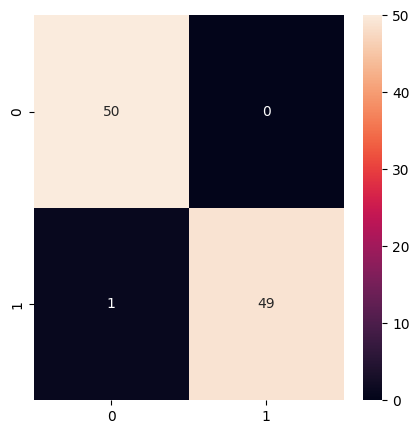

In [444]:
# load the training data and split them into X and y
train = pd.read_csv("data/train.csv")

X_train = train.drop(columns=['0'])
y_train = train['0']

# load the testing data and split them into X and y

test = pd.read_csv("data/test.csv")
X_test = test.drop(columns=['0'])
y_test = test['0']

# train a random forest classifier with the data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# make predictions with on the test data
predictions = model.predict(X_test)

# get the accuracy metric
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# make a confusion matrics to report correctly classified cases
matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [445]:
# design the cnn model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
hist = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 1s 12ms/step - loss: 0.6288 - accuracy: 0.6769
Epoch 2/50
41/41 [==============================] - 0s 5ms/step - loss: 0.4428 - accuracy: 0.8085
Epoch 3/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3782 - accuracy: 0.8331
Epoch 4/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8600
Epoch 5/50
41/41 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8569
Epoch 6/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.8754
Epoch 7/50
41/41 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.8677
Epoch 8/50
41/41 [==============================] - 0s 5ms/step - loss: 0.2806 - accuracy: 0.8785
Epoch 9/50
41/41 [==============================] - 0s 5ms/step - loss: 0.2796 - accuracy: 0.8785
Epoch 10/50
41/41 [==============================] - 0s 4ms/step - loss: 0.2596 - accuracy: 0.8900
Epoch 11/50
41/41 

In [447]:
# make predictions on the test data
pred = cnn_model.predict(X_test)

# define True or False predictions by the threshold of 0.5
predictions = []
for i in pred:
    if i > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

# get the accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)



4/4 [==============================] - 0s 2ms/step
Accuracy: 0.99


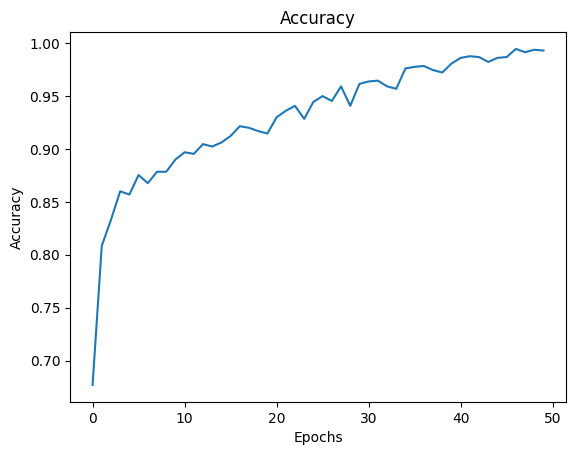

<AxesSubplot:>

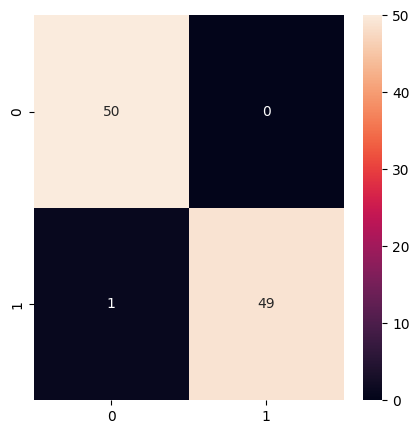

In [448]:
# plot the accuract over time
figure = plt.figure()
plt.plot(hist.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# plot the confusion matrix
matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [509]:

sorted_drowsy_sequences = sorted(drowsy_sequences.items(), key=lambda x: x[1][1], reverse=True)
sorted_non_drowsy_sequences = sorted(non_drowsy_sequences.items(), key=lambda x: x[1][1])
train = []
test = []

subject_amount = 14

def create_data(sorted_sequences, test_index):
    for x, subject in enumerate(sorted_sequences[:subject_amount]):
        sequences = subject[1][0]
        if x != test_index:
            for sequence in sequences:
                train.append(sequence)
        else:
            for sequence in sequences:
                test.append(sequence)
resutls = []
all_predictions = []
all_y_test = []
for drowsy_test in range(subject_amount):
    for non_drowsy_test in range(subject_amount):
        train = []
        test = []
        create_data(sorted_drowsy_sequences, drowsy_test)
        create_data(sorted_non_drowsy_sequences,non_drowsy_test )

        train = pd.DataFrame(train)
        test = pd.DataFrame(test)
        train.to_csv('data/train.csv', index=False)
        test.to_csv('data/test.csv', index=False)
        train = pd.read_csv("data/train.csv")

        X_train = train.drop(columns=['0'])
        y_train = train['0']
        test = pd.read_csv("data/test.csv")

        X_test = test.drop(columns=['0'])
        y_test = test['0']

        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        all_y_test.append(y_test)
        all_predictions.append(predictions)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [501]:
# sort the sequences again to test all the subjects
sorted_drowsy_sequences = sorted(drowsy_sequences.items(), key=lambda x: x[1][1], reverse=True)
sorted_non_drowsy_sequences = sorted(non_drowsy_sequences.items(), key=lambda x: x[1][1])
train = []
test = []
# define subject amount
subject_amount = 14

# define the create data function again with the same functionaliy
def create_data(sorted_sequences, test_index):
    for x, subject in enumerate(sorted_sequences[:subject_amount]):
        sequences = subject[1][0]
        if x != test_index:
            for sequence in sequences:
                train.append(sequence)
        else:
            for sequence in sequences:
                test.append(sequence)
resutls = []
all_predictions = []
all_y_test = []
# loop over every subject
for drowsy_test in range(subject_amount):
    # loop ver every subject again
    for non_drowsy_test in range(subject_amount):

        # create data with the current two subjects as test subjects
        train = []
        test = []
        create_data(sorted_drowsy_sequences, drowsy_test)
        create_data(sorted_non_drowsy_sequences,non_drowsy_test )

        # save results

        train = pd.DataFrame(train)
        test = pd.DataFrame(test)
        train.to_csv('data/train.csv', index=False)
        test.to_csv('data/test.csv', index=False)

        # open results and make them into useable data
        train = pd.read_csv("data/train.csv")

        X_train = train.drop(columns=['0'])
        y_train = train['0']
        test = pd.read_csv("data/test.csv")

        X_test = test.drop(columns=['0'])
        y_test = test['0']

        # train random forest classifier

        model = RandomForestClassifier(n_estimators=100)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        # trian cnn
        cnn_model = Sequential([
            Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
            MaxPooling1D(pool_size=2),
            Conv1D(64, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        cnn_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

        # Train the model
        hist = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

        # make predictions 1 if over 0.5 and otherwise 0
        pred = cnn_model.predict(X_test)
    
        predictions = []
        for i in pred:
            if i > 0.5:
                predictions.append(1)
            else:
                predictions.append(0)

        # add all predictions to the list
        all_y_test.append(y_test)
        all_predictions.append(predictions)

0
Epoch 1/50
22/22 [==============================] - 1s 4ms/step - loss: 0.5734 - accuracy: 0.6900
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.9014
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9214
Epoch 4/50
22/22 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9257
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9300
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9386
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1733 - accuracy: 0.9357
Epoch 8/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9343
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9386
Epoch 10/50
22/22 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9514
Epoch 11/50
22/22

In [506]:
# get predictions and target into the right form
y_test = []
for test in all_y_test:
    for i in test:
        y_test.append(i)

predictions = []
for test in all_predictions:
    for i in test:
        predictions.append(i)

Accuracy: 0.932


<AxesSubplot:>

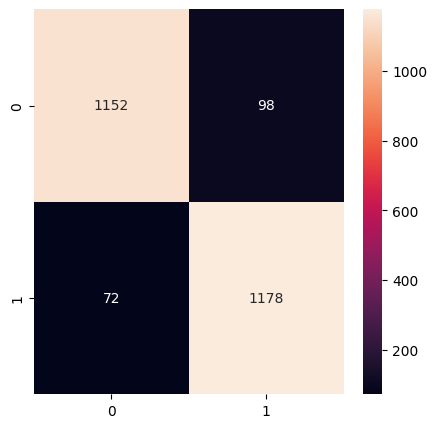

In [508]:
# get accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# make confusion matrix
matrix = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')